In [1]:
import numpy as np
from matplotlib.pylab import *
import pandas as pd

In [2]:
rcParams.update({'font.size':21})

In [3]:
data = pd.read_csv('covid_19_data.csv')

In [4]:

data['Date'] = data['ObservationDate'].apply(pd.to_datetime)
data.drop(['SNo'],axis=1,inplace=True)

In [5]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [6]:
countries = data['Country/Region'].unique().tolist()
len(countries)

161

In [7]:
data_new ={}
for name in countries:
    a = data[data['Country/Region']==name].groupby('Date').sum()
    data_new[name] = a.to_numpy()

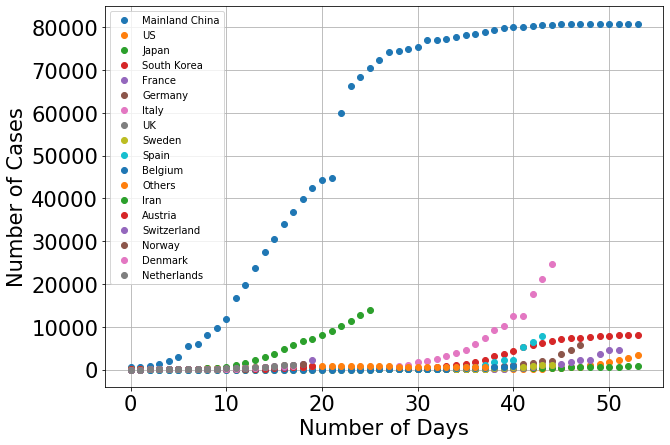

In [8]:
figure(figsize=(10,7))
large_cases = []
for name in countries:
    confirm = data_new[name][:,0]
    if confirm[-1] > 500:
        plot(confirm, 'o', label =name)
        large_cases.append(name)
legend(fontsize=10)
xlabel('Number of Days')
ylabel('Number of Cases')
grid('on')
show()


In [9]:
print('Number of cases with greater than 500 confirmed cases:', len(large_cases))

Number of cases with greater than 500 confirmed cases: 18


# A More Detailed Look at China Cases

In [33]:
from scipy.optimize import curve_fit

china_conf = data_new['Mainland China'][:,0][0:30]
china_ded = data_new['Mainland China'][:,1][0:30]
china_rev = data_new['Mainland China'][:,2][0:30]

In [34]:
# Perform exponential fit for data 
def func(x, a, b, c, d):
    return a/(d + b*np.exp(-c * x))

xdata = np.arange(0,len(china_conf),1)
popt, pcov = curve_fit(func, xdata, china_conf)

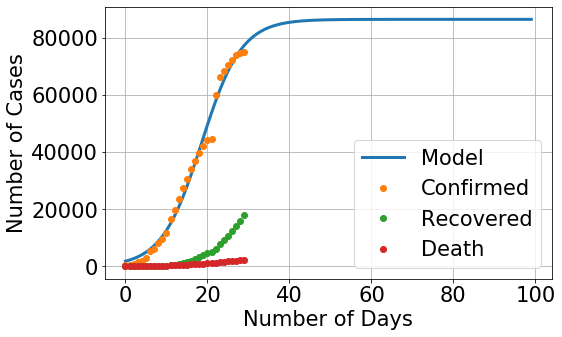

In [35]:
figure(figsize=(8,5))
x_100 = np.arange(0,100,1)
plot(x_100, func(x_100, *popt), label='Model', linewidth=3)
plot(xdata, china_conf, 'o', label='Confirmed')
plot(xdata, china_rev, 'o', label='Recovered')
plot(xdata, china_ded, 'o', label='Death')
legend()
xlabel('Number of Days')
ylabel('Number of Cases')
grid('on')
show()

In [102]:
#Build a function to plot and fit any countries
def covid(name,days, start):
    name_conf = data_new[name][:,0][start:]
    name_ded = data_new[name][:,1][start:]
    name_rev = data_new[name][:,2][start:]
    # Perform exponential fit for data 
    def func(x, a, b, c, d):
        return a/(d + b*np.exp(-c * x))

    xdata = np.arange(0,len(name_conf),1)
    x_100 = np.arange(0, days,1)
    popt, pcov = curve_fit(func, xdata, name_conf)
    figure(figsize=(10,7))
    plot(x_100, func(x_100, *popt), label='Model', linewidth=3)
    plot(xdata, name_conf, 'o', label='Confirmed')
    plot(xdata, name_rev, 'o', label='Recovered')
    plot(xdata, name_ded, 'o', label='Death')
    legend()
    xlabel('Number of Days')
    ylabel('Number of Cases')
    title(name)
    grid('on')
    show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


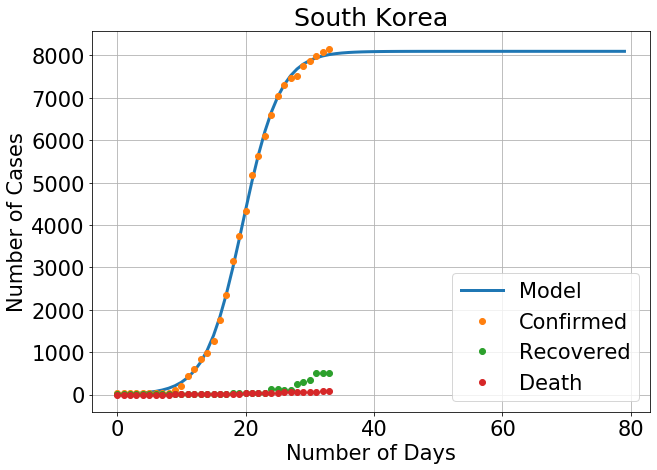

In [103]:
covid('South Korea',80,20)

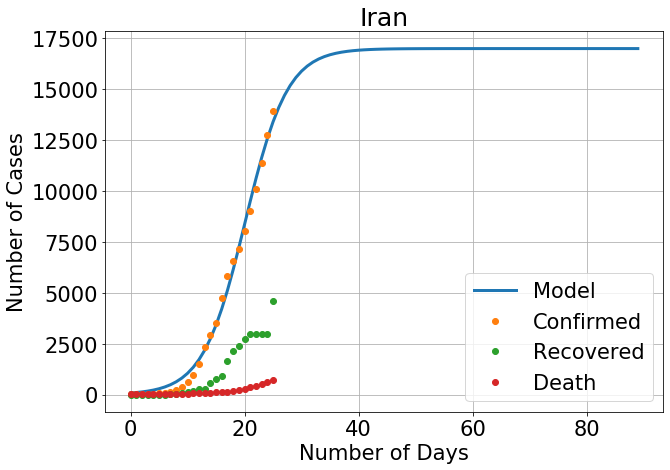

In [106]:
covid('Iran',90,0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


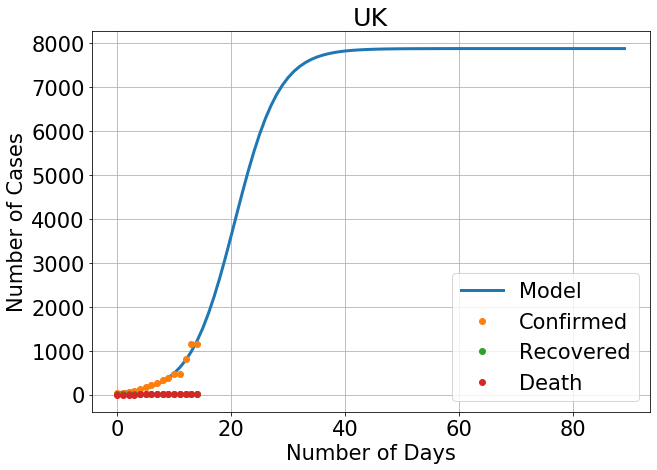

In [110]:
covid('UK',90,30)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


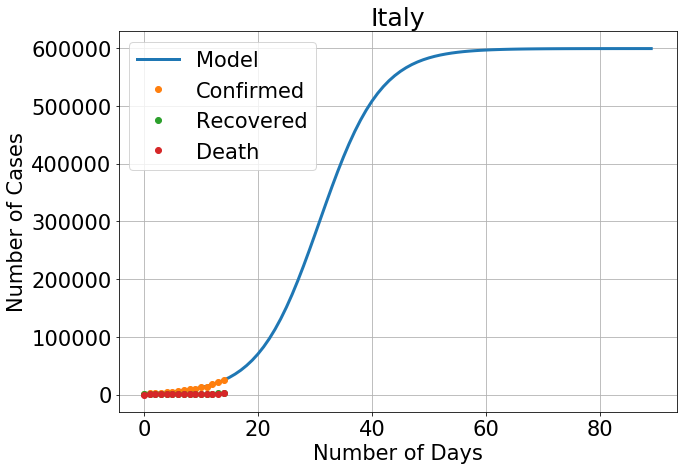

In [114]:
covid('Italy',90,30)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


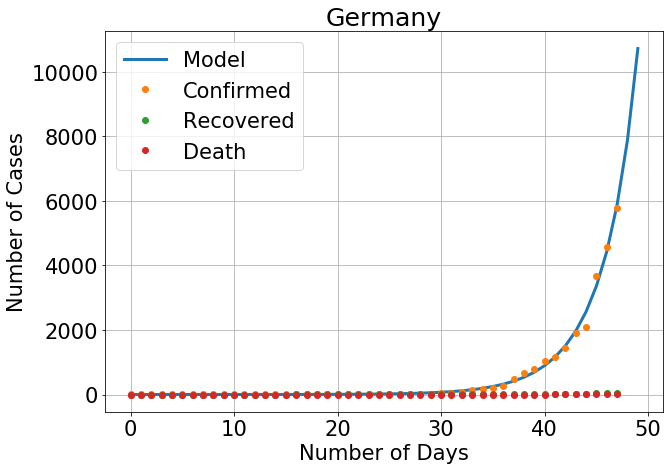

In [143]:
covid('Germany',50,0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/hal/Library/Python/3.7/lib/python/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


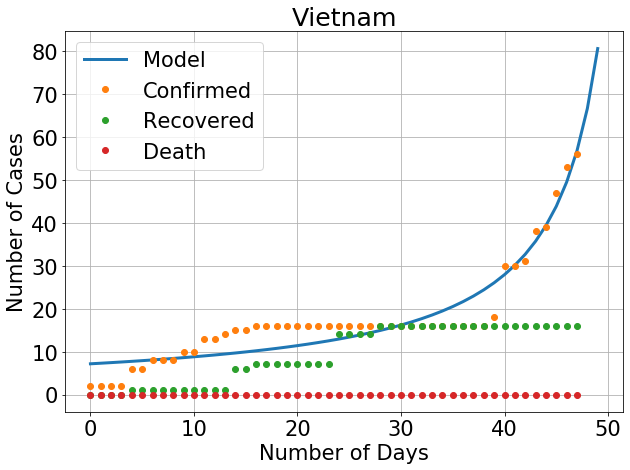

In [131]:
covid('Vietnam',50,5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


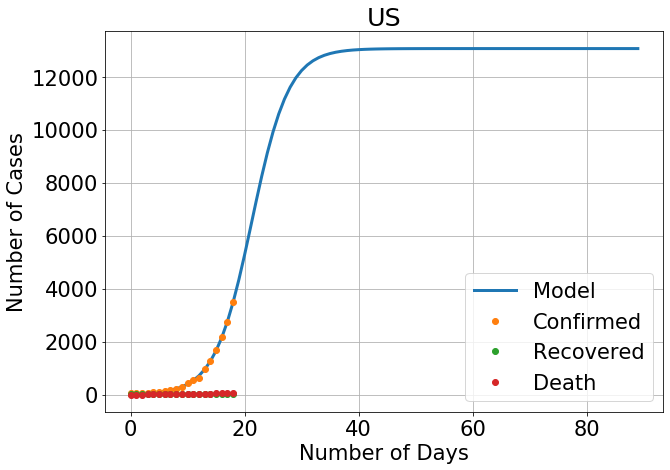

In [133]:
covid('US',90,35)